In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [2]:
os.chdir('U:\\final report\\without cheating variable')

In [18]:
dt=pd.read_excel('PCA_LUSC_L.xlsx',index_col=0)  #import data set

In [19]:
tar=pd.read_excel('survival_LUSC.xlsx') #target variable

In [20]:
import numpy as np
from sklearn import linear_model

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
Y=tar

In [23]:
X_train,X_test,y_train,y_test=train_test_split(dt,Y,test_size=0.2,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [24]:
#Applying Linear Regression
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
y_predval=lm.predict(X_val)

In [25]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % model.score(X_val, y_val))

24.117268345753445
1122.8262622990017
33.508599825999916
Variance score: -0.21


In [26]:
# KFOlD
estimator = model
kfold = KFold(n_splits=2, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())

[-0.0731899  -0.12271451]
-0.0979522078197449 0.024762304067256546


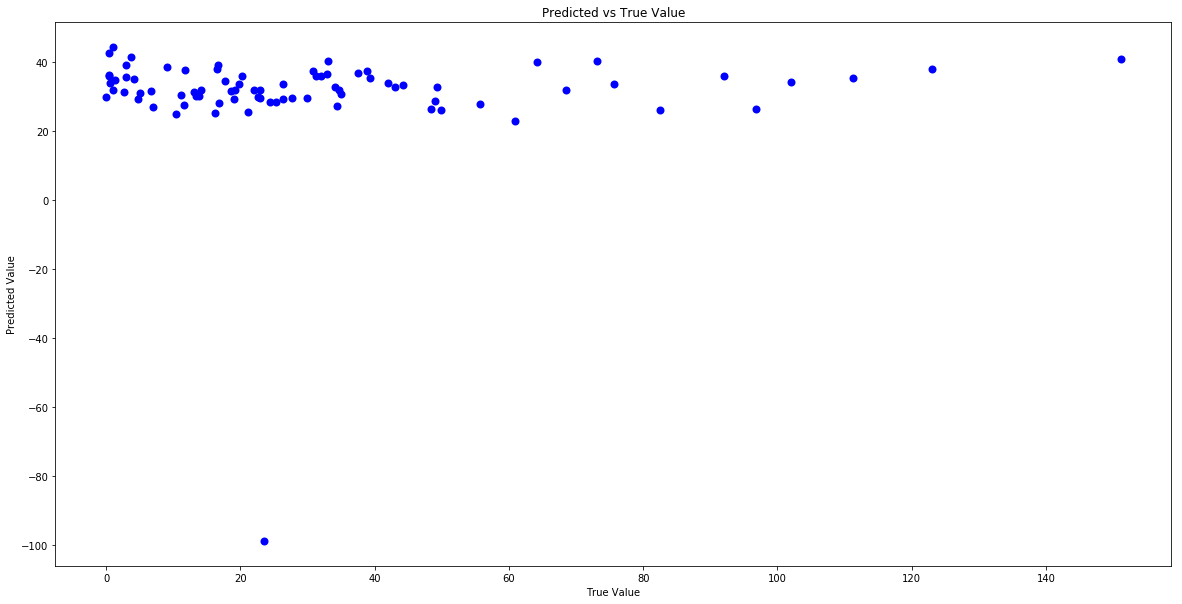

In [27]:
plt.figure(figsize=(20,10))
plt.scatter(y_val, y_predval, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [28]:
c=lm.coef_.flatten()

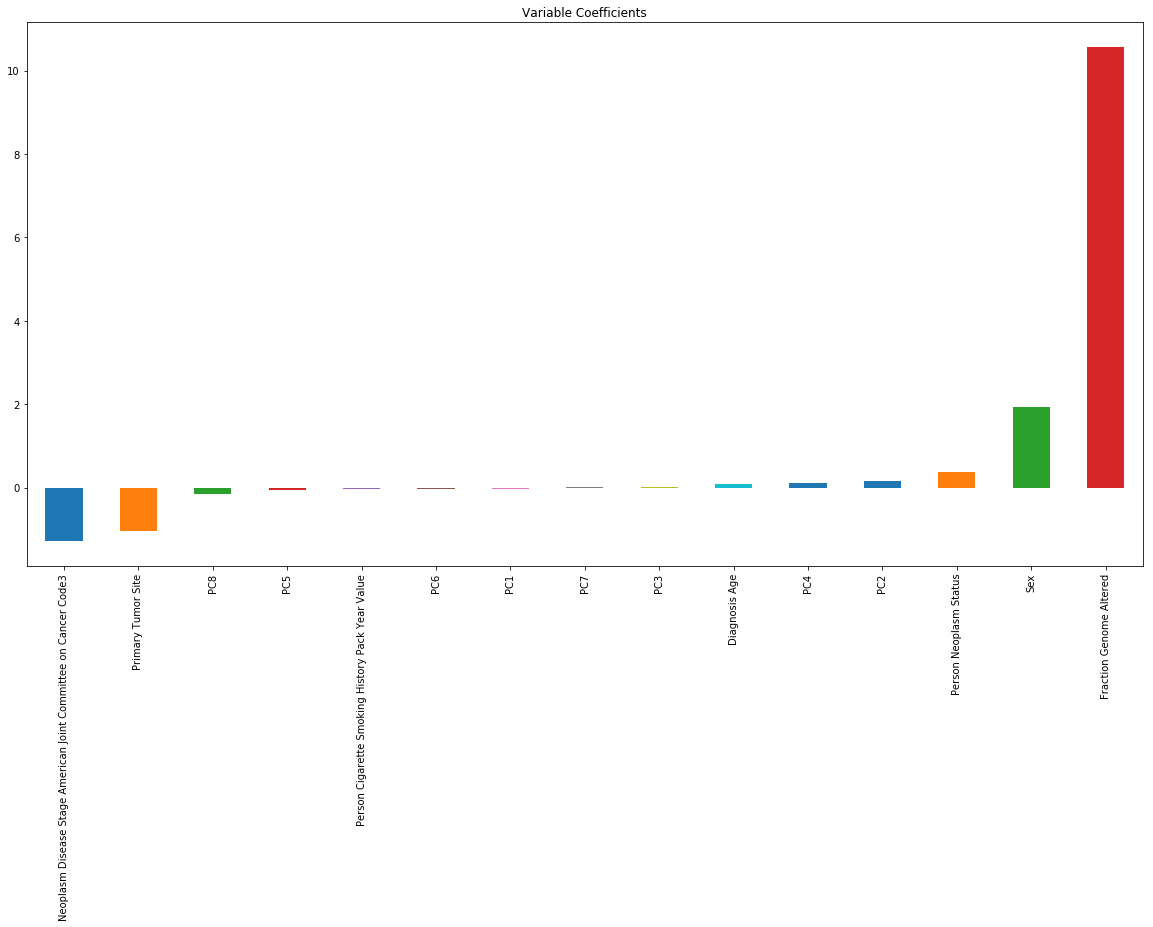

In [29]:
from pandas import Series
predictors=X_train.columns
plt.figure(figsize=(20,10))
plt.title('Variable Coefficients')
coef=Series(c,predictors).sort_values()
coef.plot(kind='bar')

In [30]:
lm.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lm.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % lm.score(X_test, y_test))


25.561778695729153
1060.8881577474024
32.57127811043654
Variance score: -0.08


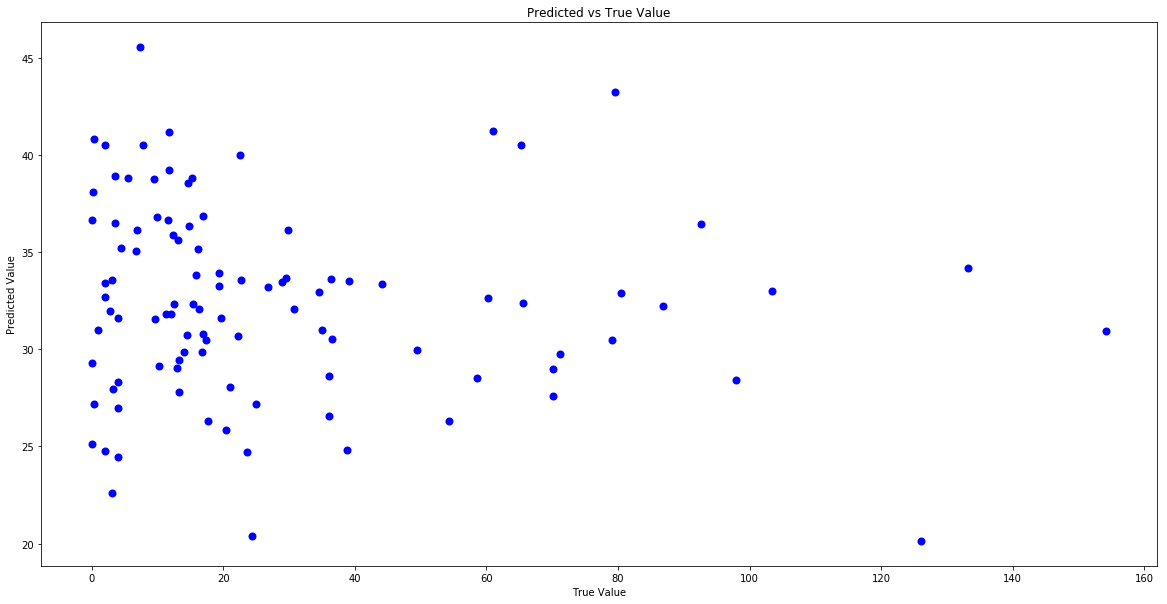

In [31]:
plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()